In [103]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import *
from sklearn.ensemble import AdaBoostClassifier


In [94]:
df = pd.read_csv('IRIS.csv')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


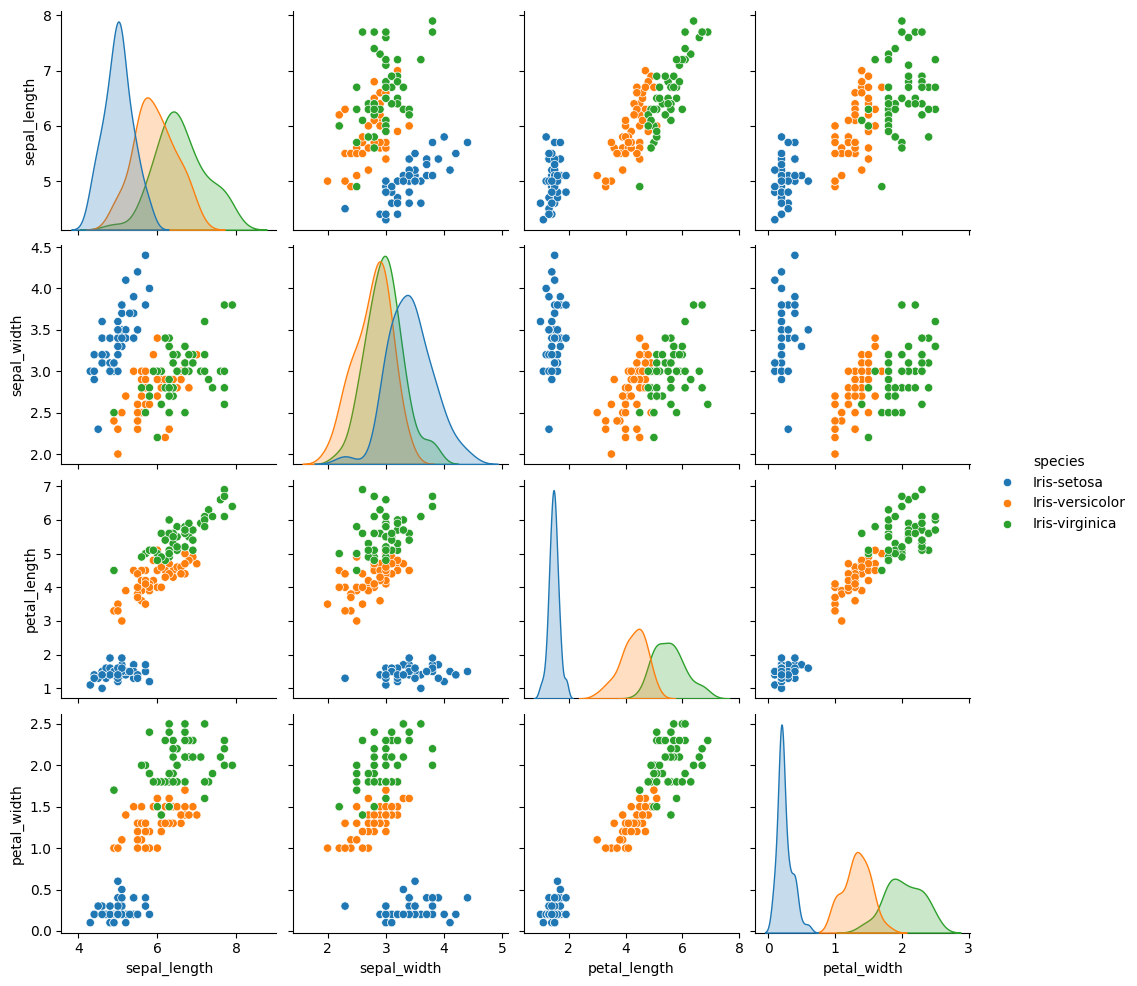

In [95]:
sns.pairplot(df, hue='species')

In [96]:
final_df = df.copy()
final_df['species'] = final_df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
final_df.drop(columns='petal_length', inplace=True)
final_df.head(150)

,sepal_length,sepal_width,petal_width,species
0,5.1,3.5,0.2,0
1,4.9,3.0,0.2,0
2,4.7,3.2,0.2,0
3,4.6,3.1,0.2,0
4,5.0,3.6,0.2,0
...,...,...,...,...
145,6.7,3.0,2.3,2
146,6.3,2.5,1.9,2
147,6.5,3.0,2.0,2
148,6.2,3.4,2.3,2


In [97]:
final_df.corr()

,sepal_length,sepal_width,petal_width,species
sepal_length,1.000000,-0.109369,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.356544,-0.419446
petal_width,0.817954,-0.356544,1.000000,0.956464
species,0.782561,-0.419446,0.956464,1.000000


Preparing the training (x, y), and testing (x, y) data

In [98]:
x = final_df.drop(columns="species")
y = final_df["species"]
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [99]:
DT = DecisionTreeClassifier(max_depth=3, random_state=20)
DT.fit(x_train, y_train)
DT_pred = DT.predict(x_test)

LOGR = LogisticRegression()
LOGR.fit(x_train, y_train)
LOGR_pred = LOGR.predict(x_test)

The decision tree

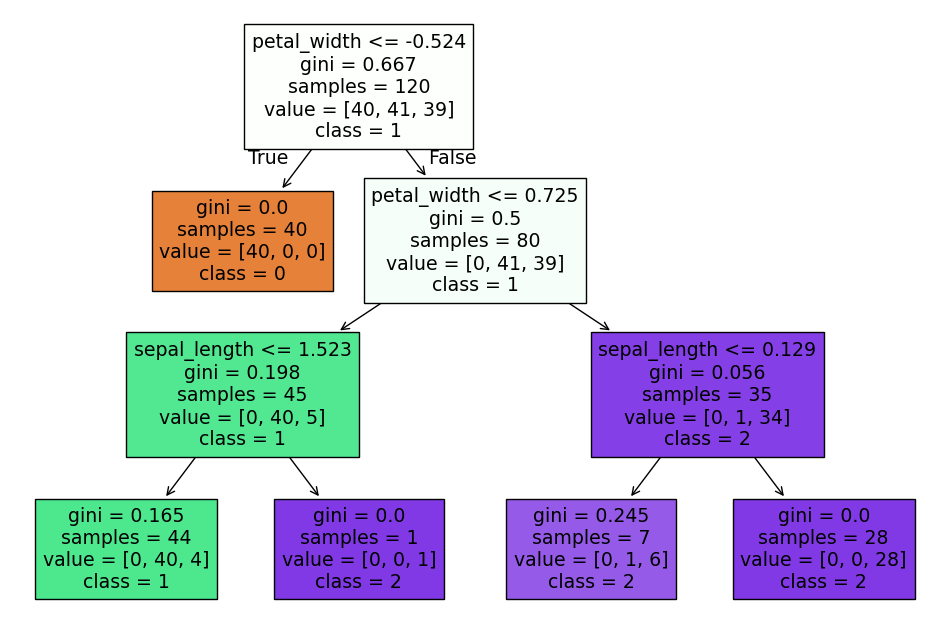

In [100]:
features = final_df.columns[:-1].tolist()
classes = DT.classes_.astype(str)
plt.figure(figsize=(12, 8))
plot_tree(DT, feature_names=features, class_names=classes, filled=True)
plt.show()

In [102]:
# DT vs LOGR
print(f'Decisionn Tree model accuracy: {accuracy_score(y_test, DT_pred)}')
print(f'LOGR model accuracy: {accuracy_score(y_test, LOGR_pred)}')

Decisionn Tree model accuracy: 1.0
LOGR model accuracy: 0.9666666666666667
